<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Module3_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## SECTION - 1 : Distance metrics

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [9]:
x = np.array((2, 4))
y = np.array((3, 6))

In [10]:
sum = 0
for i in range(len(x)):
  sum += ((x[i]-y[i])**2)
dist = math.sqrt(sum)
print(dist)

2.23606797749979


In [11]:
#TASK 1

euclidean_dist = np.sqrt(np.sum((x-y)**2))
print(euclidean_dist)

2.23606797749979


In [12]:
euclidean_dist = distance.euclidean(x,y)
print(euclidean_dist)

2.23606797749979


## 3-D Visualization

In [13]:
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

## Manhattan Distance

In [15]:
manhattan_dist = distance.cityblock(x, y)
print(manhattan_dist)

3


In [16]:
#TASK 2
manhattan_dist = np.sum(np.abs((x - y)))
print(manhattan_dist)

3


## 3D-Visualization

In [18]:
plot = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plot,plot)

In [19]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [21]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plot, y=plot)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

## Minkowski Distance

In [22]:
minkowski_distance = distance.minkowski(x, y, p=3)
print("Minkowski distance when p=3 is ",minkowski_distance)

# You can verify that this distance is the same as Manhattan dist when p=1,and Euclidean dist when p=2

minkowski_dist_p1 = distance.minkowski(x,y,p=1)
print("Minkowski distance when p=1 is ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x,y,p=2)
print("Minkowski distance when p=2 is ",minkowski_dist_p2)

Minkowski distance when p=3 is  2.080083823051904
Minkowski distance when p=1 is  3.0
Minkowski distance when p=2 is  2.23606797749979


 When we verify with Manhattan distance with p=1 and p=2 with euclidean distance,The distance between points are same as distance using minkowski distance.

## Hamming Distance

In [23]:
str_1 = 'harrys'
str_2 = 'potter'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

6.0


## Cosine Similarity

In [24]:
from numpy.linalg import norm


cosine_similarity = 1 - distance.cosine(x,y)
print(cosine_similarity)

cosine_similarity = np.dot(x, y)/(norm(x)*norm(y))
print(cosine_similarity)

1
0.9999999999999999


## Chebyshev Distance

In [25]:
chebyshev_distance = distance.chebyshev(x,y)
print(chebyshev_distance)

2


## Jaccard Distance

In [26]:
## a = no. of indices where vector1[i] == 1 == vector2[i]
## b = no. of indices where vector1[i] == 0 and vector2[i] == 1
## c = no. of indices where vector1[i] == 1 and vector2[i] == 0
## d = no. of indices where vector1[i] == 0 == vector2[i]
## Jaccard-distance = 1 - [a/(a+b+c)]

print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [27]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['dog', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse', 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is :",jaccard_similarity(words1, words2))
print("Jaccard distance is :", 1-jaccard_similarity(words1, words2))

Jaccard similarity is : 0.4
Jaccard distance is : 0.6


## SECTION - 2 : KNN

## SECTION - 2.1: KNN on a Synthetic Dataset

In [28]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

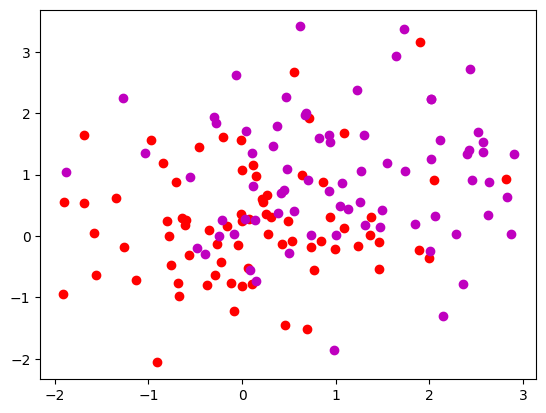

In [31]:
def generate_synth_data(n = 75):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 75
pts,tgts = generate_synth_data(n)
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "mo")
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


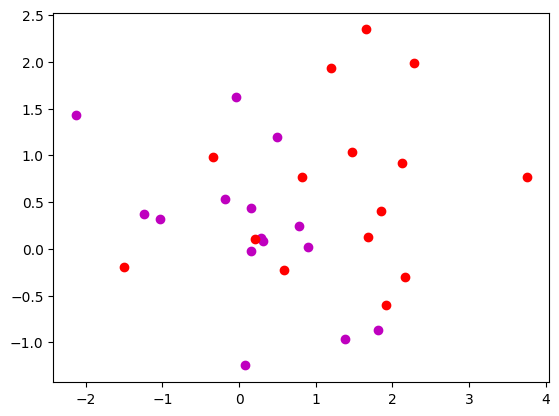

In [34]:
n = 15
testpts,testtgts = generate_synth_data(n)
print(testtgts)
plt.figure()
plt.plot(testpts[:n, 0], testpts[:n, 1], "mo")
plt.plot(testpts[n:, 0], testpts[n:, 1], "ro")
plt.show()

In [46]:
#TASK 3

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(pts, tgts)
our_predictions = knn.predict(testpts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == testtgts))

Prediction Accuracy: 
66.66666666666666


## SECTION - 2.2: KNN on a Real World dataset

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [37]:
np.random.seed(231)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [38]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [39]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [40]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [41]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [43]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 5, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
98.11320754716981



# Questions to Think About and Answer:
How are similarity and distance different from each other?

By using different distance calculation methods ,the values are equal and nearly equal.Based on neighbours the accurcay is changing.



Are there any conditions for a particular distance to be considered a "distance metric"?

yes.